In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter

In [2]:
# Create an array with the colors you want to use

colors_v = ["#74B3CE", "#629EB0","#6BA9BF", "#508991","#345A66", "#172A3A", "#0C3740","#004346",'#058068',"#09BC8A"]

# Set your custom color palette

customPalette = sns.set_palette(sns.color_palette(colors_v))

In [3]:
# Read and diplay the dataset that was extracted in the cleaning task

df = pd.read_csv(r'~\SDA - bootcamp\Capstone Project Final\Dataset\Medication_data_cleaned.csv')

del df['Unnamed: 0']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136557 entries, 0 to 136556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ORDERING_SPECIALITY  136557 non-null  object 
 1   ORDER_DATE           136557 non-null  object 
 2   ORDER_DATETIME       136557 non-null  object 
 3   DRUG_GENERIC_NAME    136557 non-null  object 
 4   DOSE                 136557 non-null  float64
 5   FREQUENCY            136557 non-null  object 
 6   DURATION             136557 non-null  object 
 7   Type                 136557 non-null  object 
 8   ORDER_END_DATETIME   136557 non-null  object 
 9   PharmacyStatus       136557 non-null  object 
 10  DSP_Qty              136557 non-null  float64
 11  Priority             136557 non-null  object 
 12  PhReviewStatus       136557 non-null  object 
 13  OrderQty             136557 non-null  float64
 14  ORDER_Month          136557 non-null  int64  
 15  ORDER_Year       

In [5]:
# Description of the statistics in the dataset (numeric values)

df.describe(include='number').transpose()

,count,mean,std,min,25%,50%,75%,max
DOSE,136557.0,16.885256,18.108308,0.5,2.5,5.0,40.0,81.0
DSP_Qty,136557.0,39.916489,37.983763,0.0,0.0,30.0,60.0,150.0
OrderQty,136557.0,876.110882,1602.030291,0.0,150.0,300.0,840.0,28800.0
ORDER_Month,136557.0,7.134156,3.427181,1.0,4.0,8.0,10.0,12.0
ORDER_Year,136557.0,2020.246168,0.737813,2019.0,2020.0,2020.0,2021.0,2021.0
DSP_Qty_Net,136557.0,38.151417,36.990437,0.0,0.0,30.0,60.0,150.0


In [6]:
# Description of the statistics in the dataset (object values)

df.describe(include='object').transpose()

,count,unique,top,freq
ORDERING_SPECIALITY,136557,48,Cardiology,105862
ORDER_DATE,136557,915,2021-03-21,353
ORDER_DATETIME,136557,91118,12/20/2020 15:11,16
DRUG_GENERIC_NAME,136557,46,"BISOPROLOL - BITROL, 5mg,Coated Tablet,Oral [3...",43192
FREQUENCY,136557,19,daily,109745
DURATION,136557,50,For 60 Day(s),67539
Type,136557,3,Out Patient,69660
ORDER_END_DATETIME,136557,97442,9/11/2021 23:58,53
PharmacyStatus,136557,5,Collected,79464
Priority,136557,4,Normal,105098


In [7]:
gropued_by_drug_names = df.groupby('DRUG_Generic_Name').agg(DSP_Qty_SUM=('DSP_Qty', 'sum'),DSP_Qty_MEAN=('DSP_Qty', 'mean')).reset_index()

NameError: name 'data' is not defined

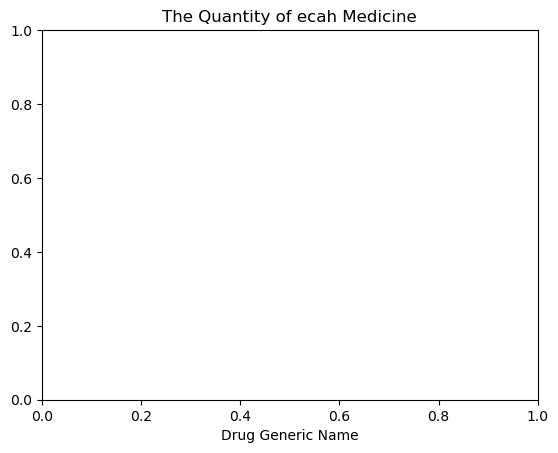

In [8]:
def millions(x, pos): # Used to formate in millions 
    'The two args are the value and tick position'
    return '%1.1f M' % (x * 1e-6)

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style = None, rc = None)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()

plt.title('The Quantity of ecah Medicine')
plt.xlabel('Drug Generic Name')

clrs = ['#62D6FC' if (x > 3000000) else '#C9C9C9' for x in data['DSP_Qty_SUM']]

sns.barplot(x='DRUG_Generic_Name',orient = 'v', y='DSP_Qty_SUM', data=data, ci=None, alpha = 0.5, ax=ax, palette = clrs)

ax1 = ax.twinx()

sns.lineplot(x='DRUG_Generic_Name', y='DSP_Qty_MEAN', marker='o', sort=False, ax=ax1, data = data, color = '#424242')

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel("Medication Generic Name")
ax.set_ylabel('Toatl of Quantity')
ax1.set_ylabel('Avg. Quantity')

plt.show()

In [ ]:
# Group by pharamcy status and years then calculate the average of the quantity.

gropued_by_status = df.groupby(['PharmacyStatus','ORDER_Year']).agg(DSP_Qty_MEAN=('DSP_Qty_Net', 'mean')).reset_index()

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x='ORDER_Year',
                  y='DSP_Qty_MEAN',
                  hue='PharmacyStatus',
                  data=gropued_by_status[gropued_by_status['ORDER_Year']>= 2019],
                  palette = ['#62D6FC',colors_v[3],colors_v[5], colors_v[0], colors_v[4]]
                 )

ax.set_xticklabels(['','Q1 2019','Q2 2019','Q3 2019', 'Q4 2019', 'Q1 2020', 'Q2 2020','Q3 2020','Q4 2020',''])
plt.title('The Realtion Betweent Years and Dispense Qantity')
ax.set_xlabel("Years")
ax.set_ylabel('Avg. Dispense Quantity')

In [ ]:
# Group by the clincs and then sort by top ordered medicine

grouped_c = df.groupby(["ORDERING_SPECIALITY","DRUG_Generic_Name"])\
['DSP_Qty'].count().sort_values(ascending=False)\
.reset_index()

In [ ]:
ax = sns.barplot(y='ORDERING_SPECIALITY', x='DSP_Qty',hue='DRUG_Generic_Name', data=grouped_c.nlargest(10,'DSP_Qty'), palette = ['#62D6FC',colors_v[3],colors_v[5]])
plt.title('Top 6 Demanding clinics')
ax.set_xlabel("No. Dispenses")
ax.set_ylabel('Clinics')

In [ ]:
df['ORDERING_SPECIALITY'].value_counts()